## Use Case: ZAF034_BA_Anti-Discrimination


### Overview

The use of Behavioral Analytics in the airline industry involves analyzing data about passenger behavior, preferences, and interactions to gain insights into customer needs and improve the customer experience. This type of analysis can help airlines optimize their services, personalize their offerings, and improve operational efficiency.

Behavioral analytics in the airline industry can involve a range of applications, including predicting flight demand, identifying patterns in passenger behavior, understanding customer feedback, and developing targeted marketing campaigns.

By leveraging behavioral analytics, airlines can better understand their customers' needs and preferences, leading to more tailored and personalized experiences. This can lead to increased customer satisfaction, loyalty, and revenue for the airline. Additionally, airlines can use behavioral analytics to improve operational efficiency, such as identifying and addressing bottlenecks in the check-in or boarding process, leading to improved on-time performance and overall customer experience.

### Methodology
The methodology for Airlines Behavioral Analytics can be broken down into several steps:

- Data Collection: Collecting the necessary data from various sources such as customer surveys, social media, website analytics, and customer databases.

- Data Preparation: Preparing the collected data for analysis by cleaning, formatting, and integrating the data. This involves identifying and addressing any missing or inaccurate data.

- Exploratory Data Analysis (EDA): Performing EDA to understand the data distribution, detect outliers, and identify correlations between variables. This step helps in identifying key factors that affect customer behavior and preferences.

- Model Development: Developing statistical and machine learning models to predict customer behavior such as booking patterns, cancellations, and preference for certain routes or amenities. This can involve using techniques such as logistic regression.

- Model Evaluation: Evaluating the developed models on a test dataset to measure their accuracy, precision, and recall.

- Model Deployment: Deploying the developed models into production to analyze real-time data and generate insights that can inform business decisions such as pricing strategies, customer segmentation, and marketing campaigns.

- Continuous Improvement: Continuously monitoring and updating the models to improve their accuracy and effectiveness over time.

### Business Segments

- Airlines
- Autonomous Driving
- Banking & Finance
- Business & Private Sector
- Healthcare
- Human Resources
- Lifestyle & Social Media
- Media & Publishing
- Retail & E-commerce


### AI Application

The AI application for Airlines Behavioral Analytics can vary depending on the specific use case and goals of the airline. However, some potential AI applications in this area could include:

- Sentiment analysis: Using natural language processing (NLP) techniques to analyze customer feedback from social media, customer reviews, and other sources to identify areas of customer dissatisfaction or areas where the airline can improve its services.

- Predictive maintenance: Using machine learning algorithms to analyze data from aircraft sensors, maintenance records, and other sources to predict when maintenance will be needed, allowing the airline to proactively schedule maintenance and minimize downtime.

- Flight optimization: Using machine learning algorithms to optimize flight routes and schedules to minimize delays and improve on-time performance.

- Personalization: Using customer data and machine learning algorithms to personalize the customer experience, offering customized recommendations for flights, services, and other offerings based on the customer's previous behavior and preferences.

- Fraud detection: Using machine learning algorithms to analyze transaction data and identify fraudulent activity, such as credit card fraud or ticket reselling scams

### Data
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service"). The project is from a dataset from Kaggle. Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment The dataset has to be downloaded from the above Kaggle website. The dataset has the following columns: tweet_id airline_sentiment airline_sentiment_confidence negativereason negativereason_confidence airline airline_sentiment_gold name negativereason_gold retweet_count text tweet_coord tweet_created tweet_location user_timezone


### Papers
- [Sentiment Classification System of Twitter Data for US Airline Service Analysis](https://ieeexplore.ieee.org/abstract/document/8377739?casa_token=zory84RjXREAAAAA:lFHcXZjxwyU2__wv51NICzt-Z_vRCtRVIYk-HJ4TAP8fObBWaUOPoYUbouf9an_70IF5cwodyw)
- [Sentiment Analysis of US Airline Twitter Data using New Adaboost Approach](https://www.researchgate.net/profile/Prabhakar-Eswaran/publication/341070490_Sentiment_Analysis_of_US_Airline_Twitter_Data_using_New_Adaboost_Approach/links/5eabc637a6fdcc70509dfb3f/Sentiment-Analysis-of-US-Airline-Twitter-Data-using-New-Adaboost-Approach.pdf)



### Demo link
Record a 1 min demo and kindly provide a link for this.


### Team

-  Sanjeeb Tiwary -	(sanjeebtiwary)
- Vaibhavi -	(Vaibhavi15-04)
- Paramesh - 	(Paramaatma)

## 1 - Load the data

In [2]:
import cv2
import contractions                                    
import re, string, unicodedata                        
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk                                             
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from bs4 import BeautifulSoup
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import pandas as pd
df = pd.read_csv('Tweets.csv')
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11.35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11.15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11.15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11.15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11.14,NaN,Pacific Time (US & Canada)
5,5.703010e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,24-02-2015 11.14,NaN,Pacific Time (US & Canada)
6,5.703010e+17,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,24-02-2015 11.13,San Francisco CA,Pacific Time (US & Canada)
7,5.703000e+17,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,24-02-2015 11.12,Los Angeles,Pacific Time (US & Canada)
8,5.703000e+17,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,24-02-2015 11.11,San Diego,Pacific Time (US & Canada)
9,5.702950e+17,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,24-02-2015 10.53,Los Angeles,Eastern Time (US & Canada)


# Understand the data EDA (Exploratory Data Analysis)

In [4]:
print('df Shape: ', df.shape)
print(df.info())

df Shape:  (14640, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 n

In [5]:
df.notnull().sum()

tweet_id                        14640
airline_sentiment               14640
airline_sentiment_confidence    14640
negativereason                   9178
negativereason_confidence       10522
airline                         14640
airline_sentiment_gold             40
name                            14640
negativereason_gold                32
retweet_count                   14640
text                            14640
tweet_coord                      1019
tweet_created                   14640
tweet_location                   9907
user_timezone                    9820
dtype: int64

In [6]:
X = df[['text', 'airline_sentiment']]
X.airline_sentiment.value_counts()/len(X)

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

In [7]:
print(X.shape)
X.isnull().sum(axis=0)  

(14640, 2)


text                 0
airline_sentiment    0
dtype: int64

In [8]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)10
print(X.head(5))

                                                                                                                             text  \
0                                                                                             @VirginAmerica What @dhepburn said.   
1                                                        @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                         @VirginAmerica I didn't today... Must mean I need to take another trip!   
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                         @VirginAmerica and it's a really big bad thing about it   

  airline_sentiment  
0           neutral  
1          positive  
2           neutral  
3          negative  
4          negative  


## 2 - Text pre-processing: Data preparation

In [9]:
sw = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stopwords = list(set(sw) - set(customlist))
lemmatizer = WordNetLemmatizer()

In [10]:
# Html tag removal, function to remove HTML tags
def html(textcpy):
    return BeautifulSoup(textcpy, 'html.parser').get_text()
X['text'] = X['text'].apply(lambda i: html(i))
X.head()

C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\KIIT\AppData\Local\Temp\ipykernel_9720\861581151.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['text'] = X['text'].apply(lambda i: html(i))


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [11]:
# Remove Underscore
def underscore (textcpy):
    return re.sub(r'_', '', textcpy)
X['text'] = X['text'].apply(lambda i: underscore(i))
X.head()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9720\1812310784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['text'] = X['text'].apply(lambda i: underscore(i))


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [12]:
import contractions

def expand_contractions(text):
    return contractions.fix(text)
X['text'] = X['text'].apply(expand_contractions)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9720\402971760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['text'] = X['text'].apply(expand_contractions)


In [13]:
def numbers(textcpy):
  return re.sub(r'\d+', '', textcpy)
X['text'] = X['text'].apply(lambda i: numbers(i))
X.head()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9720\2360402423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['text'] = X['text'].apply(lambda i: numbers(i))


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [14]:
def lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words
X['text'] = X.apply(lambda row: lowercase(row['text']), axis=1)
print(X.head())

                                                                                                                                                                                                                                                                                                                text  \
0                                                                                                                                                                                                          [@, v, i, r, g, i, n, a, m, e, r, i, c, a,  , w, h, a, t,  , @, d, h, e, p, b, u, r, n,  , s, a, i, d, .]   
1                                                                                     [@, v, i, r, g, i, n, a, m, e, r, i, c, a,  , p, l, u, s,  , y, o, u,  , h, a, v, e,  , a, d, d, e, d,  , c, o, m, m, e, r, c, i, a, l, s,  , t, o,  , t, h, e,  , e, x, p, e, r, i, e, n, c, e, ., ., .,  , t, a, c, k, y, .]   
2                                                               

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9720\3686071092.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['text'] = X.apply(lambda row: lowercase(row['text']), axis=1)


In [15]:
def non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
X['text'] = X.apply(lambda row: non_ascii(row['text']), axis=1)
print(X.head())

                                                                                                                                                                                                                                                                                                                text  \
0                                                                                                                                                                                                          [@, v, i, r, g, i, n, a, m, e, r, i, c, a,  , w, h, a, t,  , @, d, h, e, p, b, u, r, n,  , s, a, i, d, .]   
1                                                                                     [@, v, i, r, g, i, n, a, m, e, r, i, c, a,  , p, l, u, s,  , y, o, u,  , h, a, v, e,  , a, d, d, e, d,  , c, o, m, m, e, r, c, i, a, l, s,  , t, o,  , t, h, e,  , e, x, p, e, r, i, e, n, c, e, ., ., .,  , t, a, c, k, y, .]   
2                                                               

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9720\241153808.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['text'] = X.apply(lambda row: non_ascii(row['text']), axis=1)


In [16]:
def punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words
X['text'] = X.apply(lambda row: punctuation(row['text']), axis=1)
print(X.head())

                                                                                                                                                                                                                                                                                                                text  \
0                                                                                                                                                                                                                   [v, i, r, g, i, n, a, m, e, r, i, c, a,  , w, h, a, t,  , d, h, e, p, b, u, r, n,  , s, a, i, d]   
1                                                                                                    [v, i, r, g, i, n, a, m, e, r, i, c, a,  , p, l, u, s,  , y, o, u,  , h, a, v, e,  , a, d, d, e, d,  , c, o, m, m, e, r, c, i, a, l, s,  , t, o,  , t, h, e,  , e, x, p, e, r, i, e, n, c, e,  , t, a, c, k, y]   
2                                                               

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9720\1232759129.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['text'] = X.apply(lambda row: punctuation(row['text']), axis=1)


In [22]:
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

In [23]:
def join_words(words):          
    return ' '.join(map(str, words))
X['text'] = X.apply(lambda row: join_words(row['text']), axis=1)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9720\3365882411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['text'] = X.apply(lambda row: join_words(row['text']), axis=1)


Tokenize data

In [24]:
X['text'] = X.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
print(X.head())

                                                                                                                                                                                                                                                                                                                text  \
0                                                                                                                                                                                                                            [v, i, r, g, i, n, a, m, e, r, i, c, a, w, h, a, t, d, h, e, p, b, u, r, n, s, a, i, d]   
1                                                                                                                               [v, i, r, g, i, n, a, m, e, r, i, c, a, p, l, u, s, y, o, u, h, a, v, e, a, d, d, e, d, c, o, m, m, e, r, c, i, a, l, s, t, o, t, h, e, e, x, p, e, r, i, e, n, c, e, t, a, c, k, y]   
2                                                               

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9720\746372205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['text'] = X.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data


In [25]:
X['text'] = X.apply(lambda row: join_words(row['text']), axis=1)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9720\1820641012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['text'] = X.apply(lambda row: join_words(row['text']), axis=1)


Print first 5 rows of data after pre-processing.

In [26]:
print(X.head(5))

                                                                                                                                                                                                        text  \
0                                                                                                                                                  v i r g i n a m e r i c a w h a t d h e p b u r n s a i d   
1                                                                                    v i r g i n a m e r i c a p l u s y o u h a v e a d d e d c o m m e r c i a l s t o t h e e x p e r i e n c e t a c k y   
2                                                                                              v i r g i n a m e r i c a i d i d n o t t o d a y m u s t m e a n i n e e d t o t a k e a n o t h e r t r i p   
3  v i r g i n a m e r i c a i t i s r e a l l y a g g r e s s i v e t o b l a s t o b n o x i o u s e n t e r t a i n m e n t i n y o u r g u e s t s f a c e s t h e y

Save the current X values if needed for future use or recovery.

In [27]:
X_old = X
print(X_old.shape)
print(X_old.info())

(14640, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14640 non-null  object
 1   airline_sentiment  14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB
None


# Vectorization

In [29]:
# Checking the shape of the feature matrix
print("Shape of the feature matrix:", X_features.shape)

# Checking the first 10 feature names
print("First 10 feature names:\n", feature_names[:10])

NameError: name 'X_features' is not defined

Observation: X_features is a sparse matrix, that is most of the values are 0.

In [33]:
X_features.shape

(14640, 13734)

Observation: features contain 12,052 words. No limit was placed on the number of features.

In [34]:
X_features[1:5, 1:5]

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [35]:
# Convert airline_sentiment to integer encoded labels
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
values = array(X.airline_sentiment)
label_encoder = LabelEncoder()
integer_encoded_labels = label_encoder.fit_transform(values)
print(integer_encoded_labels)
print(integer_encoded_labels.shape)
print(integer_encoded_labels.dtype)

[1 2 1 ... 1 0 1]
(14640,)
int32


In [36]:
# Convert airline_sentiment to onehot encoded labels
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded_labels = integer_encoded_labels.reshape(len(integer_encoded_labels), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded_labels)
labels = onehot_encoded
labels = labels.astype('int')
print(labels.shape)
print(labels)

(14640, 3)
[[0 1 0]
 [0 0 1]
 [0 1 0]
 ...
 [0 1 0]
 [1 0 0]
 [0 1 0]]


D:\Python\Project\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fit and evaluate model using both type of vectorization.

In [37]:
import time
algo= []
tr = []
te = []
recall = []
precision = []
elapsed = []
target_names = {'negative' : 1, 'neutral' : 2, 'positive' : 3}

## 3 - Models
Using Logistic Regression to build model for the classification of reviews.

In [38]:
t = time.process_time()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_features, integer_encoded_labels, test_size=0.3, random_state=7)

lrc = LogisticRegression(random_state=7, max_iter=1000, solver='saga', n_jobs=4, multi_class='auto')
lrc.fit(X_train, np.ravel(y_train,order='C'))

print('Train Score: ', lrc.score(X_train, y_train))
print('Test Score: ', lrc.score(X_test, y_test)) 
elapsed_time = time.process_time() - t
print('Elapsed Time:', elapsed_time)

Train Score:  0.944672131147541
Test Score:  0.7930327868852459
Elapsed Time: 0.703125


In [39]:
result_lrc = lrc.predict(X_test)
algo = ['Logistic Regression']
elapsed = [elapsed_time]
tr = [lrc.score(X_train, y_train)]
te = [lrc.score(X_test, y_test)]
recall = [recall_score(y_test, result_lrc, average='micro')]
precision = [precision_score(y_test, result_lrc, average='micro')]

              precision    recall  f1-score      support
negative       0.857931  0.893678  0.875440  2784.000000
neutral        0.628707  0.569892  0.597857   930.000000
positive       0.716487  0.685841  0.700829   678.000000
accuracy       0.793033  0.793033  0.793033     0.793033
macro avg      0.734375  0.716470  0.724709  4392.000000
weighted avg   0.787558  0.793033  0.789707  4392.000000
[[2488  208   88]
 [ 304  530   96]
 [ 108  105  465]]


<Axes: >

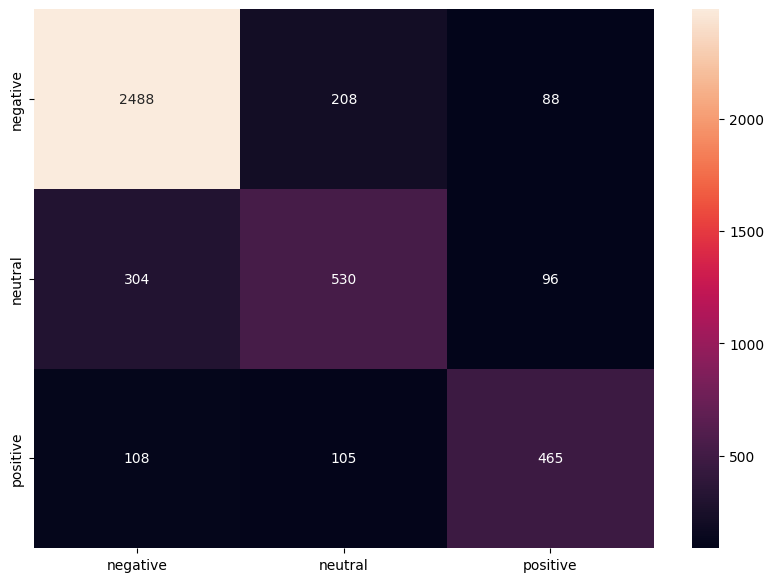

In [42]:
# Confusion Matrix, Classification report, 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

results_log = classification_report(y_test, result_lrc, target_names=target_names, output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

conf_mat = confusion_matrix(y_test, result_lrc)
print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in target_names],
                  columns = [i for i in target_names])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [43]:
# DataFrame to compare results.
print('\n CountVectorizer Comparsion Classification Results \n')
results_vec = pd.DataFrame()
results_vec['Model'] = algo
results_vec['TrainScore'] = tr
results_vec['TestScore'] = te
results_vec['Recall'] = recall
results_vec['Precision'] = precision
results_vec['ElapsedTime'] = elapsed
results_vec = results_vec.set_index('Model')
print(results_vec)


 CountVectorizer Comparsion Classification Results 

                     TrainScore  TestScore    Recall  Precision  ElapsedTime
Model                                                                       
Logistic Regression    0.944672   0.793033  0.793033   0.793033     0.703125


Use TfidfVectorizer.

In [44]:
vectorizer = TfidfVectorizer(max_features=15000, ngram_range=(1, 1))
X_features = vectorizer.fit_transform(X['text'])
# print the first 10 feature names
print(list(feature_names)[:10]) 
X_features = X_features.toarray()

['aa', 'aaaand', 'aaadvantage', 'aaalwayslate', 'aaba', 'aacom', 'aacustomerservice', 'aadavantage', 'aadelay', 'aadfw']


In [45]:
#  Command was used to look at different rows and column values
X_features[20:30,80:90]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Fit and evaluate models using TfidfVectorizer.

In [46]:
algo= []
tr = []
te = []
recall = []
precision = []
elapsed = []

Using Logistic Regression to build model for the classification of reviews

Train Score:  0.8795862607338018
Test Score:  0.785063752276867
Elapsed Time: 36.421875
              precision    recall  f1-score      support
negative       0.810627  0.942529  0.871616  2784.000000
neutral        0.660550  0.464516  0.545455   930.000000
positive       0.782435  0.578171  0.664970   678.000000
accuracy       0.785064  0.785064  0.785064     0.785064
macro avg      0.751204  0.661739  0.694014  4392.000000
weighted avg   0.774497  0.785064  0.770652  4392.000000
[[2624  123   37]
 [ 426  432   72]
 [ 187   99  392]]


<Axes: >

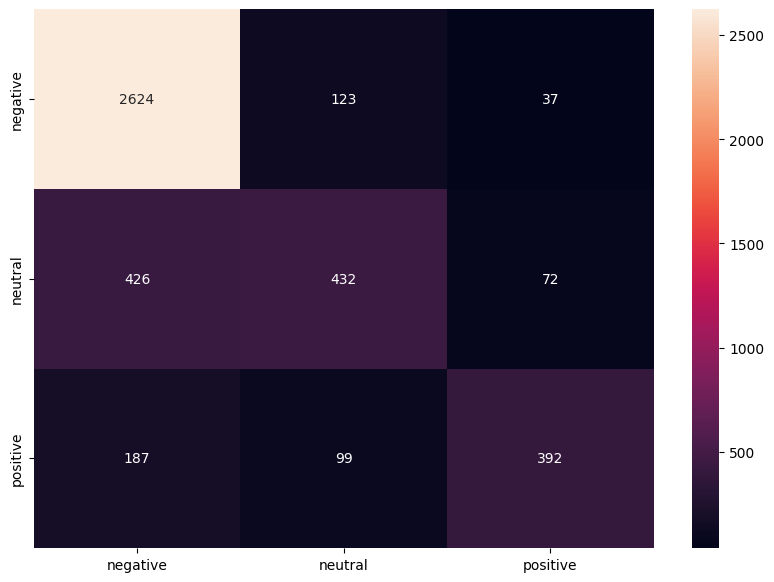

In [47]:
t = time.process_time()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_features, integer_encoded_labels, test_size=0.3, random_state=7)

lrc = LogisticRegression(random_state=7, max_iter=1000, solver='saga', n_jobs=4, multi_class='auto')
lrc.fit(X_train, np.ravel(y_train,order='C'))

print('Train Score: ', lrc.score(X_train, y_train))
print('Test Score: ', lrc.score(X_test, y_test)) 
elapsed_time = time.process_time() - t
print('Elapsed Time:', elapsed_time)

result_lrc = lrc.predict(X_test)
algo = ['Logistic Regression']
elapsed = [elapsed_time]
tr = [lrc.score(X_train, y_train)]
te = [lrc.score(X_test, y_test)]
recall = [recall_score(y_test, result_lrc, average='micro')]
precision = [precision_score(y_test, result_lrc, average='micro')]

# Confusion Matrix, Classification report, 
from sklearn.metrics import classification_report
results_log = classification_report(y_test, result_lrc, target_names=target_names, output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

conf_mat = confusion_matrix(y_test, result_lrc)
print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in target_names],
                  columns = [i for i in target_names])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

## 4 - Saving the model
Save the DS best model in the Jupyter notebook `model.ipynb` in one of the following formats:

- `network.save('model.h5')` #keras
- `joblib.dump(model, "model.pkl")` # optional
- `torch.save(model.state_dict(), './model.pt')` #pytorch
- `model.save('path/to/model')`

End of document.

In [50]:
import h5py
# Save the model to disk
with h5py.File('model.h5', 'w') as f:
    f.create_dataset('coef', data=lrc.coef_)
    f.create_dataset('intercept', data=lrc.intercept_)